In [1]:
%matplotlib widget
import gudhi as gd
import matplotlib.pyplot as plt
import numpy as np
from igraph import *
from scipy import sparse
#import ripser
import cechmate as cm
import persim
from persim import plot_diagrams

In [2]:
#set-up
np.random.seed(0)
n_iter = 100
alpha = cm.Alpha()

# First, sample points from two circles

# First point cloud has no noise
N1 = 100
t1 = np.linspace(0, 2*np.pi, N1+1)[0:N1]
Xs = [None]*2
for i in range(0,len(Xs)):
    Xs[i] = np.zeros((N1, 2))
    Xs[i][:, 0] = 1*np.cos(t1)+4*i
    Xs[i][:, 1] = 1*np.sin(t1)


X = np.concatenate(Xs)

filtration = alpha.build(X)
Ix = alpha.diagrams(filtration)[1]


r_vals1 = [None] * n_iter

# Second point cloud has a lot of noisy points

for i in range(0,n_iter):
    Y = X + 0.2*np.random.randn(N1*2, 2)
    filtration = alpha.build(Y)
    Iy = alpha.diagrams(filtration)[1]
    n_points1=len(Ix)+len(Iy)
    #compute the D_{X,Y} values
    d_vals1 = np.linspace(0,n_points1,n_points1+1)
    r_vals1[i] = [gd.prokhorov_distance(Ix, Iy, np.array([r])) for r in d_vals1]
    
# Now, sample points from four circles

# First point cloud has no noise
N2 = 100
t2 = np.linspace(0, 2*np.pi, N2+1)[0:N2]
Ws = [None]*4
for i in range(0,len(Ws)):
    Ws[i] = np.zeros((N2, 2))
    Ws[i][:, 0] = 1*np.cos(t2)+4*i
    Ws[i][:, 1] = 1*np.sin(t2)


W = np.concatenate(Ws)

filtration = alpha.build(W)
Iw = alpha.diagrams(filtration)[1]


r_vals2 = [None] * n_iter

# Second point cloud has a lot of noisy points

for i in range(0,n_iter):
    Z = W + 0.2*np.random.randn(N2*4, 2)
    filtration = alpha.build(Z)
    Iz = alpha.diagrams(filtration)[1]
    n_points2=len(Iw)+len(Iz)
    #compute the D_{W,Z} values
    d_vals2 = np.linspace(0,n_points2,n_points2+1)
    r_vals2[i] = [gd.prokhorov_distance(Iw, Iz, np.array([r])) for r in d_vals2]    



Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.00309)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 0.0811)
Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 0.00878)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.00145)
Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.000591)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 0.0888)
Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 0.00947)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.00153)
Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.000743)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 0.0884)
Constructing boundary matrix...
Finished constructing boundary 

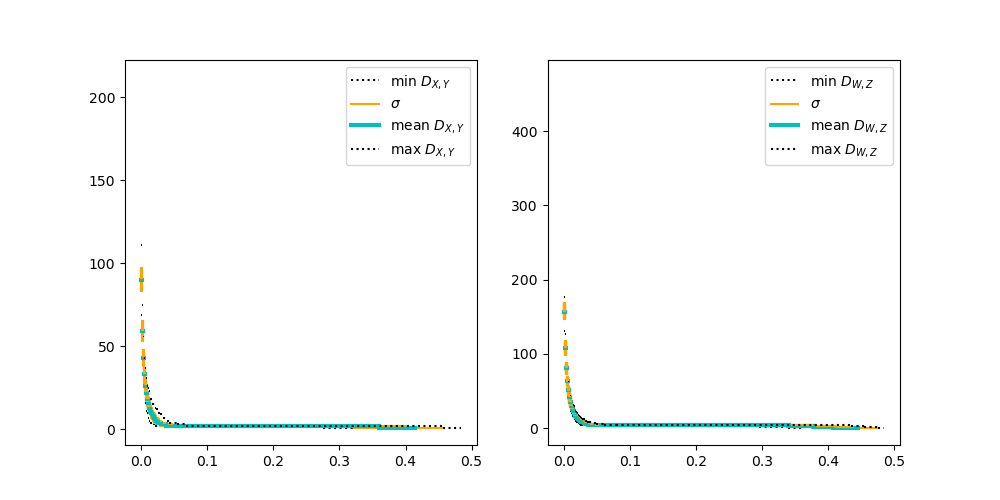

In [3]:
l1 = min([len(ar) for ar in r_vals1])
r_mean1 = [np.mean([r_vals1[i][j] for i in range(0,len(r_vals1))]) for j in range(0,l1)]
r_max1 = [np.max([r_vals1[i][j] for i in range(0,len(r_vals1))]) for j in range(0,l1)]
r_min1 = [np.min([r_vals1[i][j] for i in range(0,len(r_vals1))]) for j in range(0,l1)]
r_std1 = [np.std([r_vals1[i][j] for i in range(0,len(r_vals1))]) for j in range(0,l1)]

l2 = min([len(ar) for ar in r_vals2])
r_mean2 = [np.mean([r_vals2[i][j] for i in range(0,len(r_vals2))]) for j in range(0,l2)]
r_max2 = [np.max([r_vals2[i][j] for i in range(0,len(r_vals2))]) for j in range(0,l2)]
r_min2 = [np.min([r_vals2[i][j] for i in range(0,len(r_vals2))]) for j in range(0,l2)]
r_std2 = [np.std([r_vals2[i][j] for i in range(0,len(r_vals2))]) for j in range(0,l2)]

fig = plt.figure(figsize = (10,5))
plt.subplot(121)
for i in range(1,l1):
    plt.plot((r_min1[i],r_min1[i-1]),(i, i), c='k', ls = ':', label='min $D_{X,Y}$')
    plt.plot((r_mean1[i-1]-r_std1[i-1],r_mean1[i-1]+r_std1[i-1]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean1[i]-r_std1[i],r_mean1[i]+r_std1[i]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean1[i],r_mean1[i-1]),(i, i), c='c', linewidth = 3, label='mean $D_{X,Y}$')
    plt.plot((r_max1[i],r_max1[i-1]),(i, i), c='k', ls = ':', label='max $D_{X,Y}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

plt.subplot(122)
for i in range(1,l2):
    plt.plot((r_min2[i],r_min2[i-1]),(i, i), c='k', ls = ':', label='min $D_{W,Z}$')
    plt.plot((r_mean2[i-1]-r_std2[i-1],r_mean2[i-1]+r_std2[i-1]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean2[i]-r_std2[i],r_mean2[i]+r_std2[i]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean2[i],r_mean2[i-1]),(i, i), c='c', linewidth = 3, label='mean $D_{W,Z}$')
    plt.plot((r_max2[i],r_max2[i-1]),(i, i), c='k', ls = ':', label='max $D_{W,Z}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

In [4]:
def D(r_vals, t):
    return np.min(np.where(np.array(r_vals)<=t))

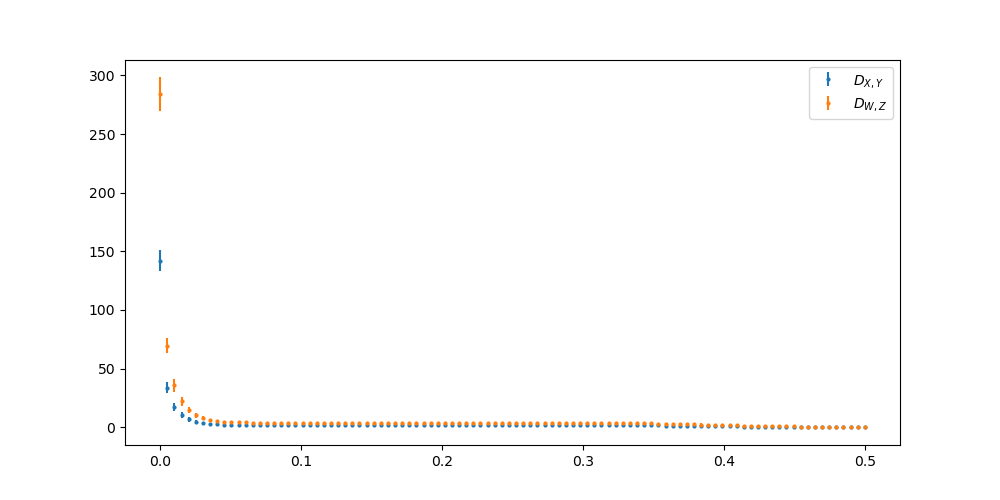

In [6]:
fig = plt.figure(figsize = (10,5))
ts = np.linspace(0,0.5,100)
Dmean = np.array([np.mean([D(r,t) for r in r_vals1]) for t in ts])
Dstd = np.array([np.std([D(r,t) for r in r_vals1]) for t in ts])
plt.errorbar(ts,Dmean,Dstd, linestyle='None', marker='o', ms = 2, label = "$D_{X,Y}$")

Dmean = np.array([np.mean([D(r,t) for r in r_vals2]) for t in ts])
Dstd = np.array([np.std([D(r,t) for r in r_vals2]) for t in ts])
plt.errorbar(ts,Dmean,Dstd, linestyle='None', marker='o', ms = 2, label = "$D_{W,Z}$")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

plt.show()

<IPython.core.display.Javascript object>


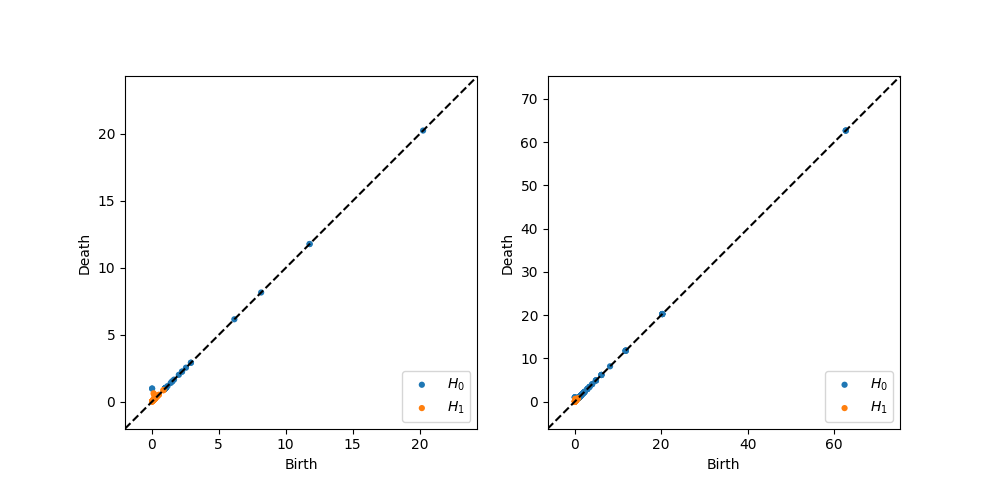

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(121)
persim.plot_diagrams([Ix,Iy])
plt.subplot(122)
persim.plot_diagrams([Iw,Iz])
plt.show()

<IPython.core.display.Javascript object>


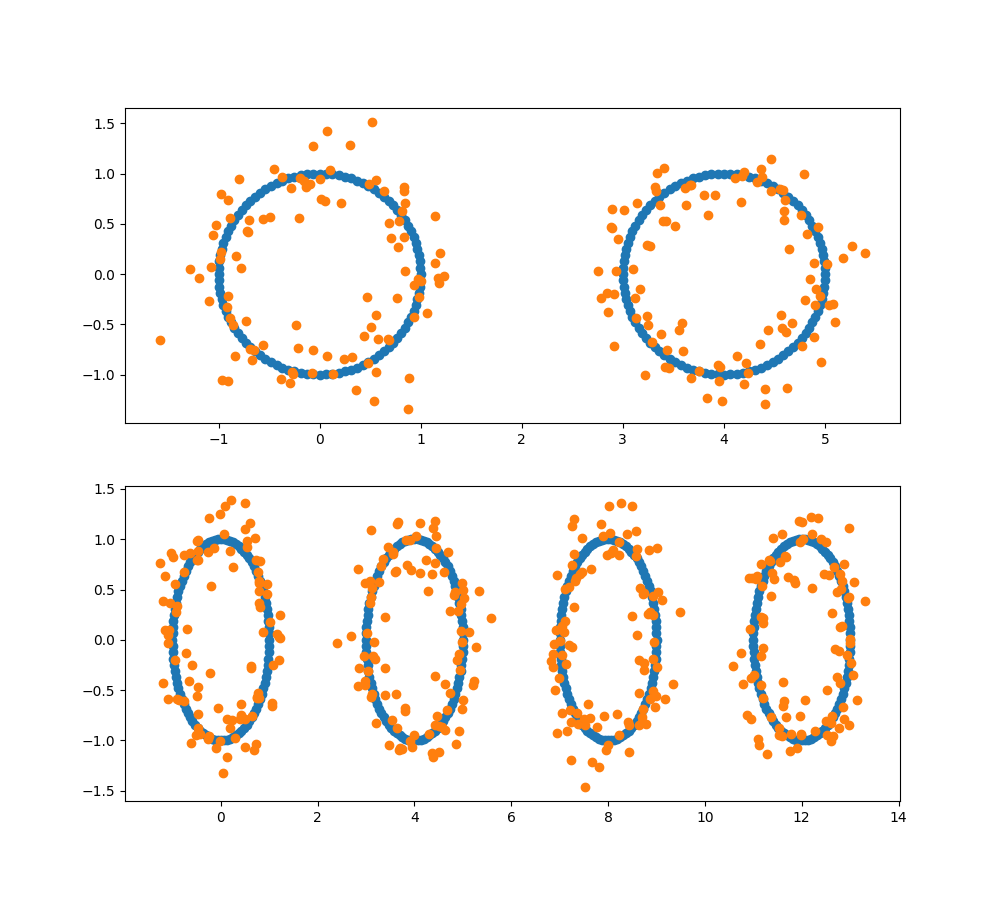

In [27]:
plt.figure(figsize=(10,9))
plt.subplot(211)
plt.scatter(X[:,0],X[:,1])
plt.scatter(Y[:,0],Y[:,1])
plt.subplot(212)
plt.scatter(W[:,0],W[:,1])
plt.scatter(Z[:,0],Z[:,1])
plt.show()